Aqui serão resolvidas as atividades da primeira lista de Visão Computacional pelo aluno Sillas Rocha da Costa, começaremos realizando alguns imports:

In [218]:
import cv2 as cv
import sys
import matplotlib.pyplot as plt
import numpy as np

Agora veremos se a leitura de imagens do opencv está funcionando sem mais problemas, ao usar a biblioteca do matplotlib para plotar as imagens, se baseando no post do github de [como plotar imagens em um notebook](https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88).

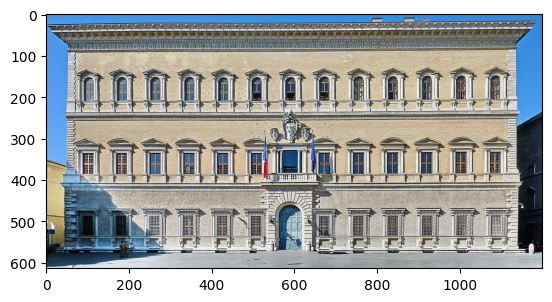

In [219]:
img = cv.imread('./Palazzo_Farnese_Fassade.jpg')
img2 = img[:,:,::-1]
plt.imshow(img2)

# Exercício 1 - Rotação de uma Imagem

Agora, se baseando na função de base de rotação passada, criaremos a função my_rotation, com as matrizes de translação e rotação respectivamente seguindo:

```python
matriz_translacao = np.array([
    [1, 0, -centro[0]],
    [0 ,1, -centro[1]],
    [0, 0, 1]
])

matriz_rotacao = np.array([
    [np.cos(angulo), -np.sin(angulo), 0],
    [np.sin(angulo), np.cos(angulo), 0],
    [0, 0, 1]
])
```


In [220]:
def my_rotation(img, angulo, centro):
    
    # nessa primeira parte, vamos definir a transformação que leva a posicao dos pixels da imagem original
    # para a posicao dos pixels do imagem rotacionada.

    # a primeira matriz de translação muda a origem das coordenadas do canto da imagem para o centro da imagem
    matriz_translacao = np.array([
        [1, 0, -centro[0]],
        [0 ,1, -centro[1]],
        [0, 0, 1]
    ])

    # a matriz de rotacao aplica a rotacao em torno da origem
    matriz_rotacao = np.array([
        [np.cos(angulo), -np.sin(angulo), 0],
        [np.sin(angulo), np.cos(angulo), 0],
        [0, 0, 1]
    ])
    
    # a composicao coloca todas as matrizes em uma só: aplica a translacao (muda a origem), rotaciona, volta para a origem anterior
    matriz_composicao = np.linalg.inv(matriz_translacao) @ matriz_rotacao @ matriz_translacao

    # criar imagem rotacionada em preto, com mesmas dimensões da original
    lines, columns = img.shape[:2]
    rotated_image = np.zeros((lines, columns ,3), np.uint8)
    # o próximo passo é percorrer cada pixel da nova imagem e verificar qual é o pixel correspondente na imagem original

    for line in range(lines):
        for col in range(columns):
            pos_orig = np.array([line, col, 1])
            pos_rot = matriz_composicao @ pos_orig

            new_line = round(pos_rot[0])
            new_col = round(pos_rot[1])
        
            if (new_line >= 0 and new_line < lines) and (new_col >= 0 and new_col < columns):
                rotated_image[new_line, new_col] = img[line, col]
                
    return rotated_image

E então aplicaremos a função à nossa imagem, ao obter o resultado:

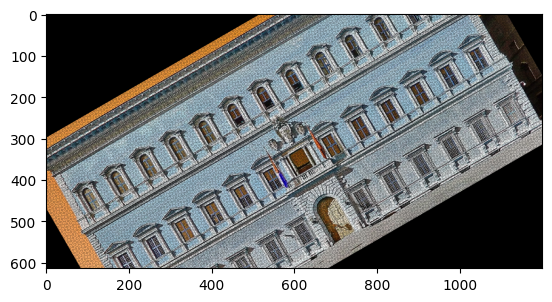

In [221]:
height, width = img.shape[:2]
centro = (height/2, width/2)
angulo = np.pi/6
my_rotated_image = my_rotation(img, angulo, centro)

plt.imshow(my_rotated_image)

Ao comparar com a função da biblioteca opencv, vemos que está funcionando corretamente.

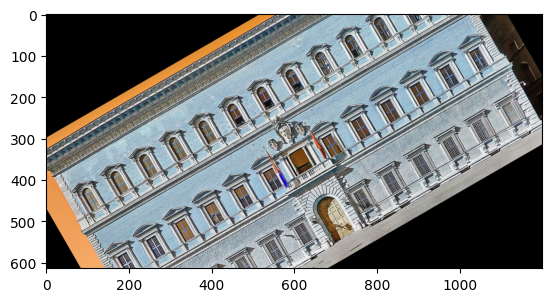

In [222]:
height, width = img.shape[:2]
center = (width/2, height/2)

# Definir a matriz de rota ̧c~ao
M = cv.getRotationMatrix2D(center, 30, 1)

# Aplicar a rota ̧c~ao na imagem
rotated_img = cv.warpAffine(img, M, (width, height))
plt.imshow(rotated_img)

# Exercício 2 - Transformação Projetiva de uma Imagem